# Importing Libraries

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Analysing data

In [142]:
#Loading CSV file
airbnb = pd.read_csv('AB_NYC_2019.csv')

In [143]:
#Taking a look at first 5 lines
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [17]:
#Analysing the shape of the dataframe
airbnb.shape

(48895, 16)

In [18]:
#Analysing columns' type
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [70]:
#Let's take a look at how many na there are in the dataframe
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [144]:
#Removing columns which are not going to be part of my analysis and saving the new dataframe
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)

In [145]:
#Filling NA in reviews_per_month per 0. Reasoning is that if it doesn't have a value, it means it has never been reviewed prevously.
#Consequently reviews are 0.
airbnb.fillna({'reviews_per_month':0}, inplace=True)

In [146]:
#Checking that there are no more nans.
#The 16 cases of nans in na are not going to be modified as it could be the owner forgot to put the description on it and additionally it does not affect in our analysis.
airbnb.isna().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [23]:
#Analysing deeply the neighbourhood_group
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [24]:
#Analysing deeply the neighbourhood
airbnb['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Woodrow                  1
Richmondtown             1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [25]:
#Analysing deeply the room_type
airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [26]:
#Analysing deeply the minimum_nights column
airbnb['minimum_nights'].value_counts().sort_values()

364        1
153        1
185        1
400        1
250        1
       ...  
4       3303
30      3760
3       7999
2      11696
1      12720
Name: minimum_nights, Length: 109, dtype: int64

# Visualization

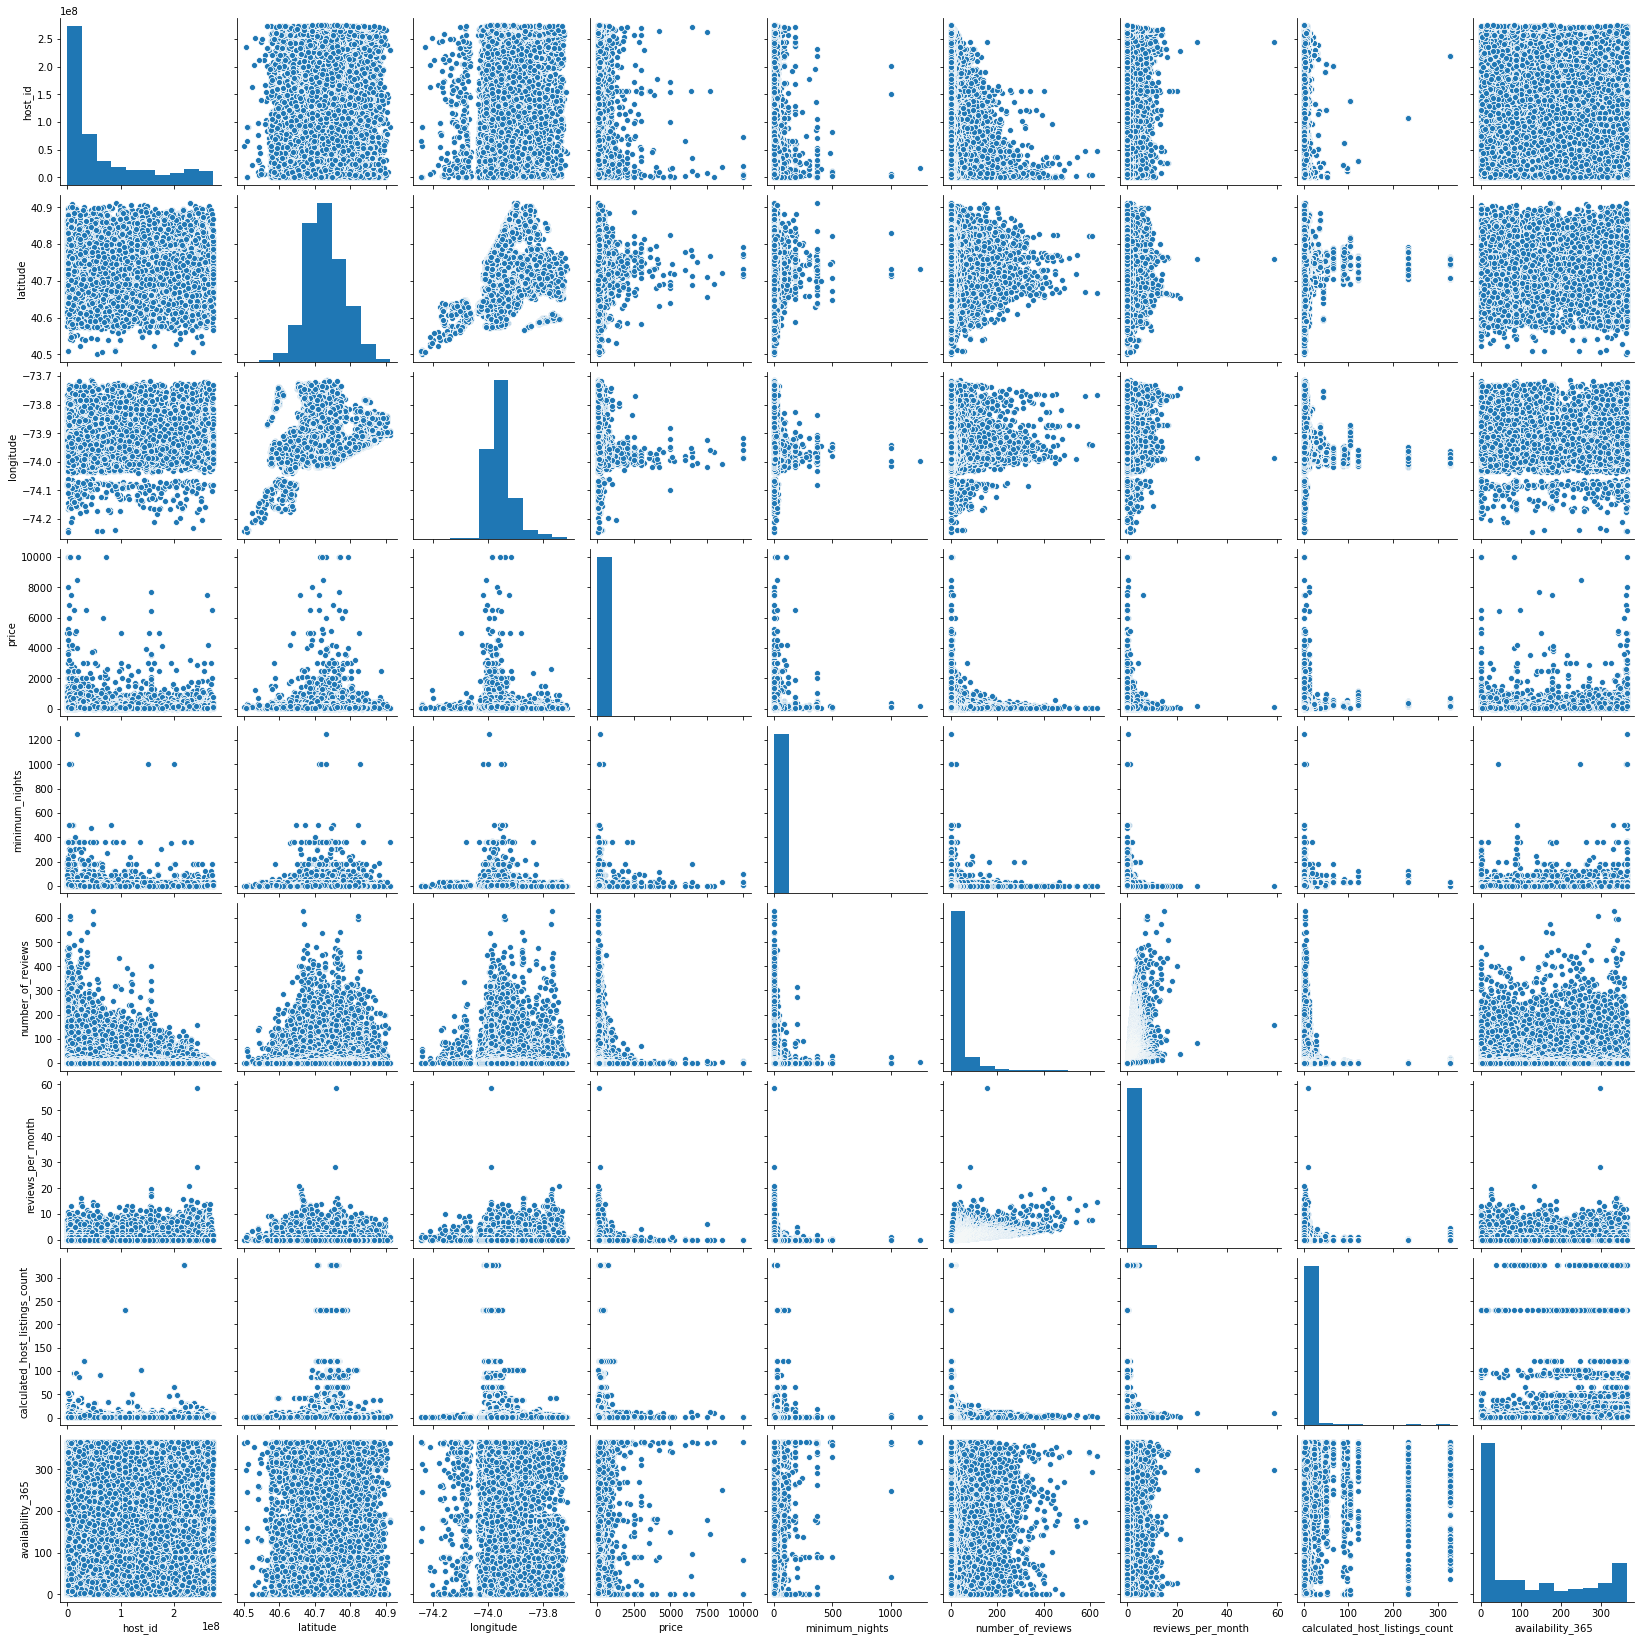

In [27]:
sns.pairplot(airbnb);

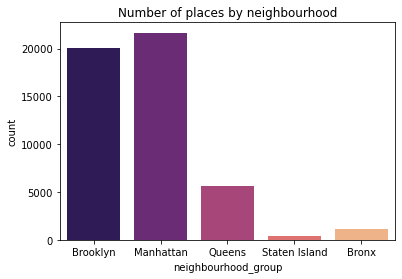

In [28]:
sns.countplot(airbnb['neighbourhood_group'], palette='magma').set_title('Number of places by neighbourhood');

**Manhattan and Brooklyn are the two neighbourhoods where there are more places to stay**

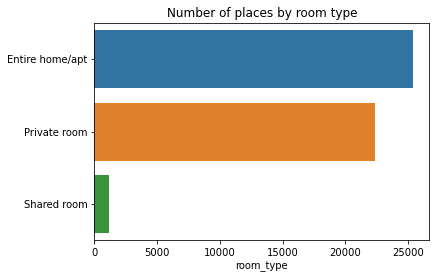

In [30]:
roomtype_count = airbnb['room_type'].value_counts()
sns.barplot(x=roomtype_count, y=roomtype_count.keys()).set_title('Number of places by room type');

**The places to be rent are either entire home/apartaments or private room. Rarely shared rooms are an option**

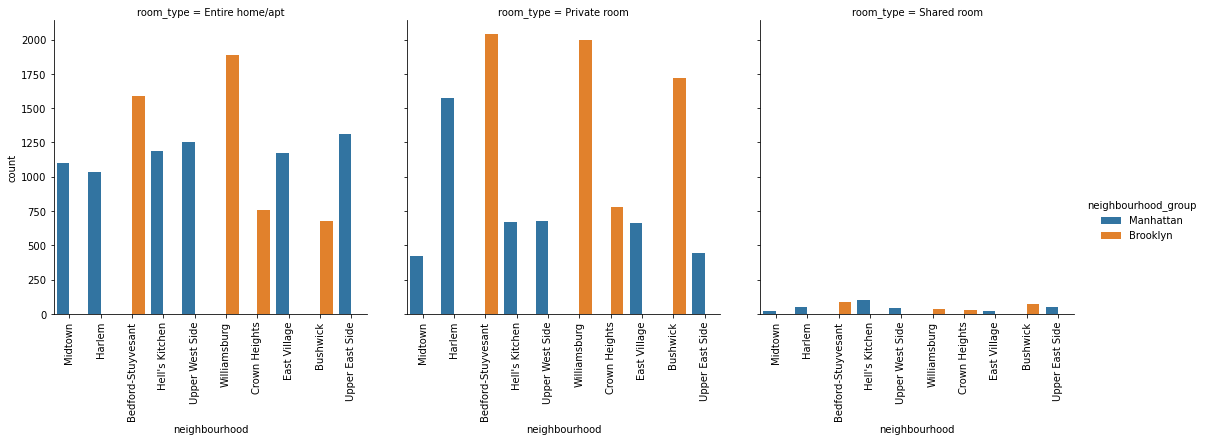

In [53]:
#Checking the number of places by room_type in each neighbourhood
g=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
g.set_xticklabels(rotation=90);

**The distribution of places in Manhattan is comparable between neighbourhoods. In Brooklyn instead, Williamsburg and Bedford have more places**

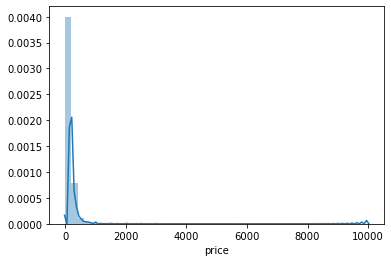

In [38]:
sns.distplot(airbnb.price);

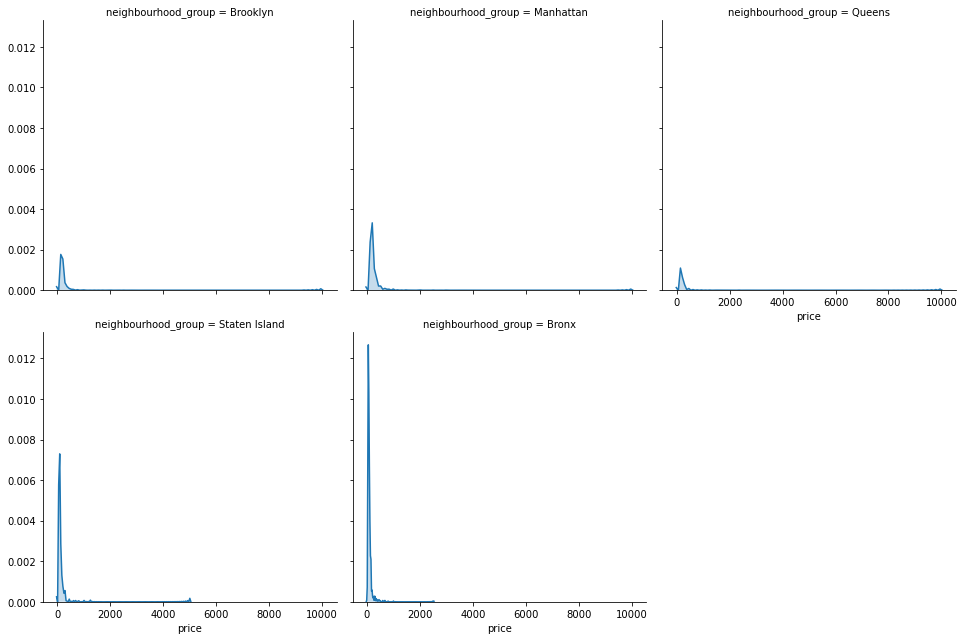

In [31]:
#Checking the distribution of prices by neighbourhood_group.
g = sns.FacetGrid(airbnb, col="neighbourhood_group", col_wrap=3, height=4.5)
res = g.map(sns.kdeplot, 'price', shade=True);

**At first sight Brooklyn and Queens have a similar distribution. Manhattan has the highest prices and Staten Island and Bronx the lowest. The outcome is the expected one**

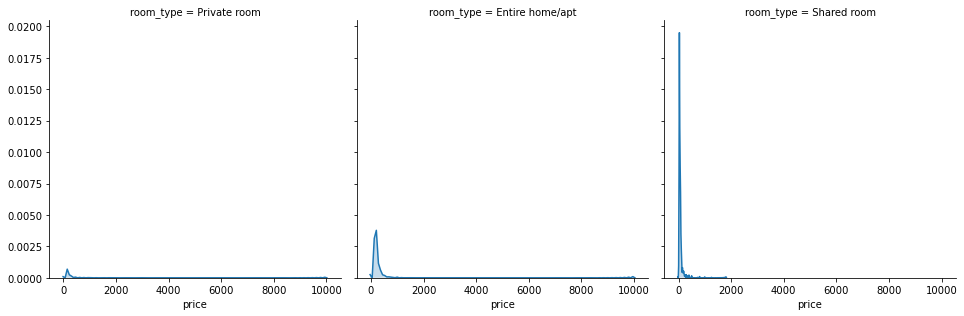

In [32]:
#Checking the distribution of prices by room_type
g = sns.FacetGrid(airbnb, col="room_type", col_wrap=3, height=4.5)
res = g.map(sns.kdeplot, 'price', shade=True);

**Prices of shared room are lower than private rooms or whole apartaments. As the offer of whole apartments is higher, the distrubtion is more dense**

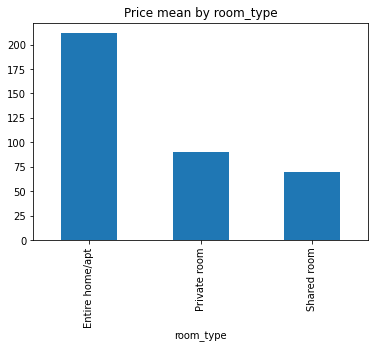

In [34]:
airbnb.groupby('room_type').price.mean().plot(kind='bar').set_title("Price mean by room_type");

**The offer of entire apartments and private rooms was quite similar. Nevertheless, the mean of prices differs a lot**

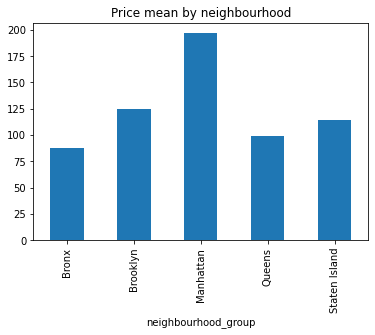

In [35]:
airbnb.groupby('neighbourhood_group').price.mean().plot(kind='bar').set_title("Price mean by neighbourhood");

**At first sight we excepted that Manhattan had the highest mean. What we did not except is that other neighbourhoods group had quite similar mean values**

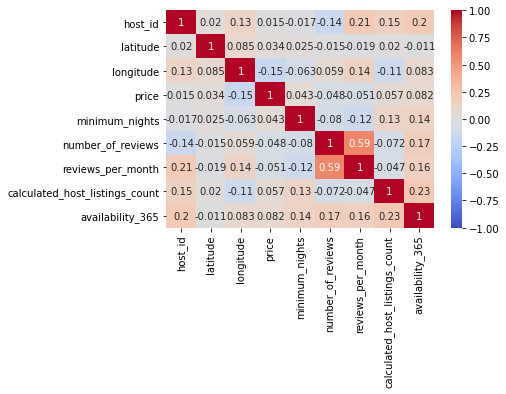

In [37]:
sns.heatmap(airbnb.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1);

**As in correlation perspective, there is no big correlation between the variables**

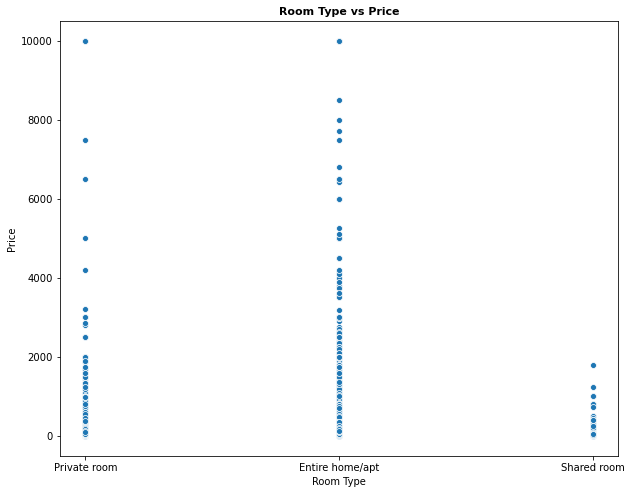

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='room_type', y='price', data=airbnb)

plt.xlabel("Room Type", size=10)
plt.ylabel("Price", size=10)
plt.title("Room Type vs Price",size=11, weight='bold');

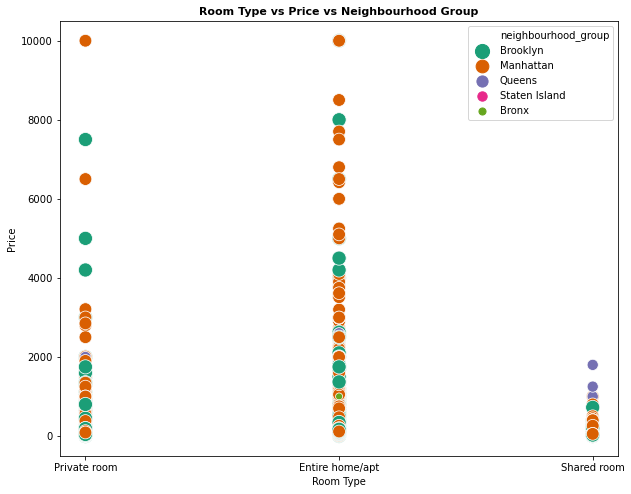

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="room_type", y="price", hue="neighbourhood_group", size="neighbourhood_group", sizes=(50, 200), palette="Dark2", data=airbnb)

plt.xlabel("Room Type", size=10)
plt.ylabel("Price", size=10)
plt.title("Room Type vs Price vs Neighbourhood Group",size=11, weight='bold');

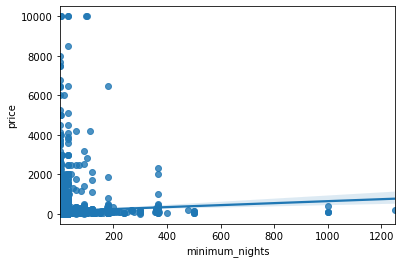

In [41]:
sns.regplot(data=airbnb, x='minimum_nights', y='price');

# Model

In [51]:
from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [87]:
#Convert the float categories into onehot encoding
onehot = pd.get_dummies(airbnb[['neighbourhood_group', 'room_type']])

In [91]:
onehot.head()

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0
2,0,0,1,0,0,0,1,0
3,0,1,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0


In [90]:
airbnb = airbnb.drop(['neighbourhood_group', 'room_type'], axis=1)

In [92]:
airbnb = airbnb.join(onehot)

In [93]:
#Let's take a look at the correlation again
airbnb.corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
host_id,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492,0.073008,-0.115918,0.002389,0.131425,0.034479,-0.077591,0.056616,0.069415
latitude,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983,0.330669,-0.672932,0.590639,0.017145,-0.190894,-0.005712,0.004363,0.004473
longitude,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731,0.221315,0.017735,-0.433531,0.622749,-0.291841,-0.192143,0.183613,0.029812
price,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829,-0.041030,-0.098603,0.163976,-0.080205,-0.013840,0.255857,-0.240246,-0.053613
minimum_nights,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303,-0.018186,-0.039658,0.067362,-0.032629,-0.009400,0.074900,-0.073837,-0.004218
number_of_reviews,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028,0.009258,0.017414,-0.045820,0.035967,0.015088,-0.010087,0.017253,-0.023355
reviews_per_month,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732,0.036390,-0.021512,-0.063723,0.107927,0.026648,-0.029565,0.030178,-0.001714
calculated_host_listings_count,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701,-0.022511,-0.123234,0.152842,-0.033881,-0.012838,0.112193,-0.108945,-0.011737
availability_365,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000,0.060806,-0.079671,-0.005434,0.087113,0.057885,-0.006804,-0.010986,0.058294
neighbourhood_group_Bronx,0.073008,0.330669,0.221315,-0.041030,-0.018186,0.009258,0.036390,-0.022511,0.060806,1.000000,-0.126239,-0.134730,-0.054693,-0.013245,-0.052092,0.042765,0.031041


## Neighbourhood vs price

In [94]:
#Neighbourhood vs price
model = LinearRegression()

In [95]:
X = airbnb[['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island']]
y = airbnb['price']

In [96]:
model.fit(X,y)

LinearRegression()

In [97]:
model.score(X,y)

0.028223999735468297

In [98]:
y_pred = model.predict(X)

In [99]:
y_pred

array([124.546875 , 196.7421875, 196.7421875, ..., 196.7421875,
       196.7421875, 196.7421875])

In [100]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

model.fit(X_train, y_train)

print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

0.029604515826920585
0.024088618347557045


In [101]:
model.coef_

array([2.23599483e+14, 2.23599483e+14, 2.23599483e+14, 2.23599483e+14,
       2.23599483e+14])

In [102]:
mean_absolute_error(y, y_pred)

86.73169211448001

In [103]:
r2_score(y, y_pred) 

0.028223999735468297

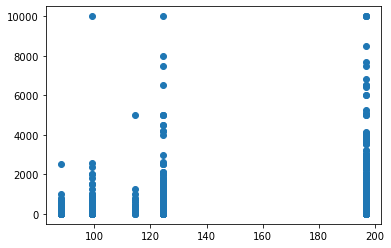

In [104]:
import matplotlib.pyplot as plt

plt.scatter(y_pred,y);

## Room_type vs price

In [105]:
#Room_type vs price
X1 = airbnb[['room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']]
y1 = airbnb['price']

In [106]:
model = LinearRegression()
model.fit(X1,y1)

LinearRegression()

In [107]:
model.score(X1,y1)

0.06561240614498676

In [108]:
y_pred1 = model.predict(X1)

In [109]:
y_pred1

array([ 89.49609375, 212.0546875 ,  89.49609375, ..., 212.0546875 ,
        70.00390625,  89.49609375])

In [111]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size=0.3)

model.fit(X_train, y_train)

print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

0.060646797516518025
0.0824003036652805


In [112]:
model.coef_

array([-1.84985506e+14, -1.84985506e+14, -1.84985506e+14])

In [113]:
mean_absolute_error(y1, y_pred1)

75.90038778888434

In [114]:
r2_score(y1, y_pred1) 

0.06561240614498676

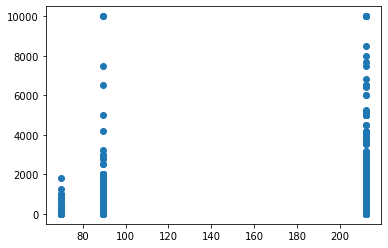

In [115]:
plt.scatter(y_pred1,y1);

## Neighbourhood_Group & Room_type vs price

In [116]:
#Neighbourhood_Group & Room_type vs price
X2 = airbnb[['neighbourhood_group_Bronx', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island',
             'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']]
y2 = airbnb['price']

In [117]:
model = LinearRegression()
model.fit(X2,y2)

LinearRegression()

In [118]:
model.score(X2,y2)

0.08159358730335897

In [119]:
y_pred2 = model.predict(X2)

In [120]:
y_pred2

array([ 71.703125, 240.96875 , 129.09375 , ..., 240.96875 , 107.09375 ,
       129.09375 ])

In [121]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.3)

model.fit(X_train, y_train)

print(model.score(X_train,y_train))

print(model.score(X_test,y_test))

0.08508101896344
0.07412127013686198


In [122]:
mean_absolute_error(y2, y_pred2)

73.22831258308621

In [123]:
r2_score(y2, y_pred2) 

0.08159358730335897

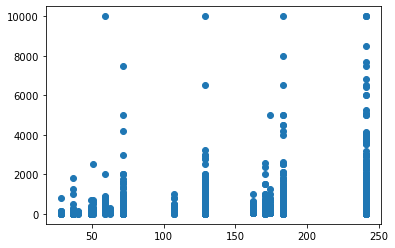

In [124]:
plt.scatter(y_pred2,y2);

**Conclusion:**
    
We do not have enough data in the model to make predictions with accuracy.

Variables such as number of rooms or squarred metters will have given more visibility to predict prices

# Hyphotesys

In [125]:
#Importin data again
airbnb = pd.read_csv('AB_NYC_2019.csv')
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)
airbnb.fillna({'reviews_per_month':0}, inplace=True)

## Price depends on neighbourhood_group

In [127]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('airbnb.price ~C(airbnb["neighbourhood_group"])', data=airbnb).fit()
anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
"C(airbnb[""neighbourhood_group""])",7.959096e+07,4.0,354.994839,7.723724e-302
Residual,2.740323e+09,48890.0,NaN,NaN


In [128]:
print(anova['PR(>F)'][0] < 0.05)

True


**Pvalue is so small that we can reject the Null Hyphotesis**

## Price depends on the number of minimum_nights

In [129]:
model = ols('airbnb.price ~C(airbnb["minimum_nights"])', data=airbnb).fit()
anova1 = sm.stats.anova_lm(model, typ=2)
anova1

,sum_sq,df,F,PR(>F)
"C(airbnb[""minimum_nights""])",9.014107e+07,108.0,14.916525,3.375522e-261
Residual,2.729773e+09,48786.0,NaN,NaN


In [130]:
print(anova1['PR(>F)'][0] < 0.05)

True


**Pvalue is so small that we can reject the Null Hyphotesis**

## Manhattan mean differs from 200 dollars per night

In [133]:
manhattan_prices = airbnb['price'][airbnb['neighbourhood_group'] == 'Manhattan']

In [134]:
from scipy import stats
m = 200

t_test = stats.ttest_1samp(manhattan_prices, m)
print(t_test)

Ttest_1sampResult(statistic=-1.5780170656606587, pvalue=0.1145762924374337)


**As pvalue is higher 5% we can NOT reject the null hyphotesis**

## Mean of Manthattan prices vs Mean of Brooklyn prices**

In [135]:
def t_test_features(s1, s2, features=['price']):
    results = {}
    
    for feature in features:
        p_val = stats.ttest_ind(s1[feature], s2[feature])[1]
        results.update({feature : p_val})
    
    return results

In [137]:
manhattan = airbnb[airbnb['neighbourhood_group'] == 'Manhattan']
brooklyn = airbnb[airbnb['neighbourhood_group'] == 'Brooklyn']

t_test_features(manhattan, brooklyn)

{'price': 8.973192961269122e-196}

**Consequently we can confidently declare the null-hypothesis as rejected.**

## Mean of Manthattan prices vs Mean of other neighbourhood prices**

In [138]:
manhattan = airbnb[airbnb['neighbourhood_group'] == 'Manhattan']
other = airbnb[airbnb['neighbourhood_group'] != 'Manhattan']

t_test_features(manhattan, other)

{'price': 9.229121380218848e-292}

**Consequently we can confidently declare the null-hypothesis as rejected.**